<a href="https://colab.research.google.com/github/Billl000/CS361-Project/blob/main/GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Generation

In [2]:
%matplotlib inline
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

dim_theta = 10
data_num = 1000
scale = .1

theta_true = np.ones((dim_theta,1))
print('True theta:', theta_true.reshape(-1))

A = np.random.uniform(low=-1.0, high=1.0, size=(data_num,dim_theta))
y_data = A @ theta_true + np.random.normal(loc=0.0, scale=scale, size=(data_num, 1))

A_test = np.random.uniform(low=-1.0, high=1.0, size=(50, dim_theta))
y_test = A_test @ theta_true + np.random.normal(loc=0.0, scale=scale, size=(50, 1))

True theta: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# Solving for the exact mean squared loss (solving Ax = b)

In [3]:
#print('Not implemented.')

'''
Hints:
1. See the least squares solution to Ax = b (when it is covered in lecture).

2. Use Numpy functions like Numpy's linear algebra functions to solve for x in Ax = b.
In fact, the linear algebra module is already imported with ```import numpy.linalg as la```.

3. Use the defined variable A in Ax = b. Use y_data as b. Use theta_pred as x.
'''
pred, _, _, _ = la.lstsq(A, y_data)
theta_pred = pred # TODO: Implement the analytical solution

print('Empirical theta', theta_pred.reshape(-1))

Empirical theta [0.99543487 1.00363487 0.99773335 0.99692322 1.00589505 0.9909569
 1.00238823 0.997611   1.00786127 0.998555  ]


# SGD Variants Noisy Function

In [4]:
batch_size = 1
max_iter = 1000
lr = 0.001
theta_init = np.random.random((10,1)) * 0.1

In [6]:
def noisy_val_grad(theta_hat, data_, label_, deg_=2.):
    gradient = np.zeros_like(theta_hat)
    loss = 0

    for i in range(data_.shape[0]):
        x_ = data_[i, :].reshape(-1,1)
        y_ = label_[i, 0]
        err = np.sum(x_ * theta_hat) - y_

        print('Not implemented.')

        '''
        Hints:
        1. Find the gradient and loss for each data point x_.
        2. For grad, you need err, deg_, and x_.
        3. For l, you need err and deg_ only.
        4. Checkout the writeup for more hints.
        '''
        grad = deg_ * (np.abs(err)**(deg_ - 1)) * np.sign(err) * x_  # TODO: Implement the analytical gradient
        l = err ** deg_ # TODO: Implement the loss function

        loss += l / data_.shape[0]
        gradient += grad / data_.shape[0]

    return loss, gradient

# Running SGD Variants

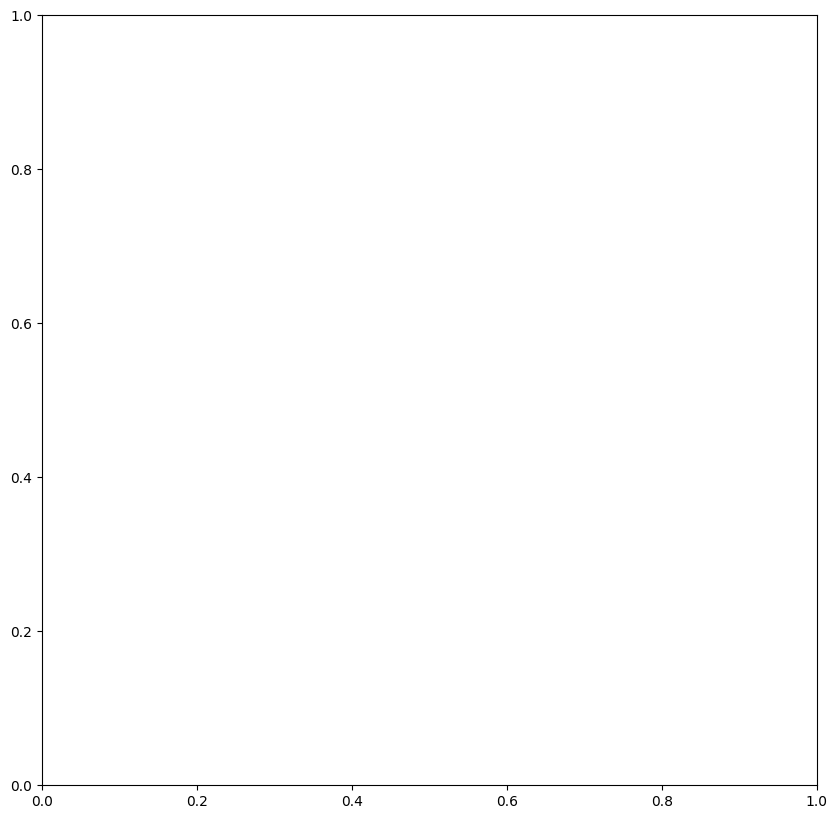

In [7]:
#@title Parameters
deg_ = 2. #@param {type: "number"}
num_rep = 10 #@param {type: "integer"}
max_iter = 1000 #@param {type: "integer"}
fig, ax = plt.subplots(figsize=(10,10))
best_vals = {}
test_exp_interval = 50 #@param {type: "integer"}
grad_artificial_normal_noise_scale = 0. #@param {type: "number"}

Streaming output truncated to the last 5000 lines.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemented.
Not implemente

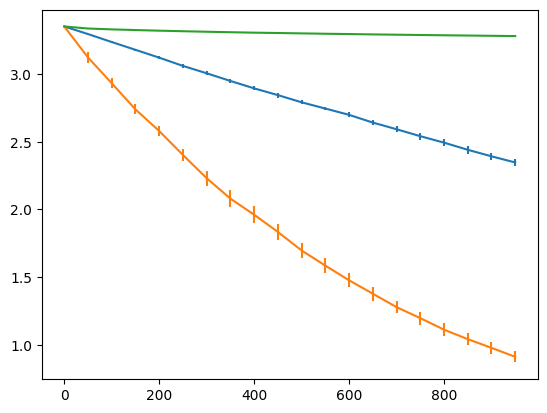

In [8]:
for method_idx, method in enumerate(['adam', 'sgd', 'adagrad']):
    test_loss_mat = []
    train_loss_mat = []

    for replicate in range(num_rep):
        if replicate % 20 == 0:
            print(method, replicate)

        if method == 'adam':
            #print('Adam Not implemented.')
            beta_1 = 0.9
            beta_2 = 0.999
            m = 0 # TODO: Initialize parameters
            v = 0
            epsilon = 10**(-8)

        if method == 'adagrad':
            #print('Adagrad Not implemented.')
            epsilon = 10**(-8) # TODO: Initialize parameters
            squared_sum = 0

        theta_hat = theta_init.copy()
        test_loss_list = []
        train_loss_list = []

        for t in range(max_iter):
            idx = np.random.choice(data_num, batch_size) # Split data
            train_loss, gradient = noisy_val_grad(theta_hat, A[idx,:], y_data[idx,:], deg_=deg_)
            artificial_grad_noise = np.random.randn(10, 1) * grad_artificial_normal_noise_scale + np.sign(np.random.random((10, 1)) - 0.5) * 0.
            gradient = gradient + artificial_grad_noise
            train_loss_list.append(train_loss)

            if t % test_exp_interval == 0:
                test_loss, _ = noisy_val_grad(theta_hat, A_test[:,:], y_test[:,:], deg_=deg_)
                test_loss_list.append(test_loss)

            if method == 'adam':
                #print('Adam Not implemented.') # TODO: Implement Adam
                m = beta_1 * m + (1 - beta_1) * gradient
                v = beta_2 * v + (1 - beta_2) * (gradient ** 2)
                m_hat =  m / (1 - beta_1 ** (t + 1))
                v_hat =  v / (1 - beta_2 ** (t + 1))
                theta_hat = theta_hat - lr * m_hat / (la.norm(v_hat) ** 0.5 + epsilon)

            elif method == 'adagrad':
                #print('Adagrad Not implemented.') # TODO: Implement Adagrad
                squared_sum = squared_sum + (gradient ** 2)
                theta_hat = theta_hat - lr * gradient / (la.norm(squared_sum) ** 0.5 + epsilon)

            elif method == 'sgd':
                theta_hat = theta_hat - lr * gradient

        test_loss_mat.append(test_loss_list)
        train_loss_mat.append(train_loss_list)

    print(method, 'done')
    x_axis = np.arange(max_iter)[::test_exp_interval]

    print('test_loss_np is a 2d array with num_rep rows and each column denotes a specific update stage in training')
    print('The elements of test_loss_np are the test loss values computed in each replicate and training stage.')
    test_loss_np = np.array(test_loss_mat)

    #print('Not implemented.')
    '''
    Hints:
    1. Use test_loss_np in np.mean() with axis = 0
    '''
    test_loss_mean = np.mean(test_loss_np, axis=0) # TODO: Calculate the mean test loss

    '''
    Hints:
    1. Use test_loss_np in np.std() with axis = 0
    2. Divide by np.sqrt() using num_rep as a parameter
    '''
    test_loss_se = np.std(test_loss_np, axis=0) / np.sqrt(num_rep) # TODO: Calculate the standard error for test loss

    plt.errorbar(x_axis, test_loss_mean, yerr=2.5*test_loss_se, label=method)
    best_vals[method] = min(test_loss_mean)

In [ ]:
best_vals = { k: int(v * 1000) / 1000. for k,v in best_vals.items() } # A weird way to round numbers
plt.title(f'Test Loss \n(objective degree: {deg_},  best values: {best_vals})')
plt.ylabel('Test Loss')
plt.legend()
plt.xlabel('Updates')